In [1]:
#start at minute mark 1h:26m:17s for makemore
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn.functional as F

In [2]:
words = open('names.txt','r').read().splitlines()

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()} 

In [4]:
import torch.nn.functional as F

In [5]:
#Use NN for probability generation

#create the training set of biagrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w)+ ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs) #note: tensor infers the dtype, while if Tensor is used it will be FloatTensor
ys = torch.tensor(ys) 

. e
e m
m m
m a
a .


In [6]:
#randomly initialize 27 neuros weights. each neuron receieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True) #requires_grad as grad for backward pass

In [7]:
#forward pass - including softmax section
#all can be backpropagated since they are differentiable operations
xenc = F.one_hot(xs, num_classes=27).float() #input to the network: one-hot encoding
logits = xenc @ W #predict log-counts

#next 2 lines are together called a 'softmax' layer in a NN -exp value and then normalise the sum to 1 (probabilities)
counts = logits.exp() #counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) #normalisation - probabilities for next character

In [8]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4,0] #probabilities of character indexes (y)
#automate way of during this
probs[torch.arange(5), ys] #arange gives back 0..5

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [9]:
#calculate loss, as discussed at the end of first part
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [10]:
#backward pass
W.grad = None #zerograd
loss.backward()

In [11]:
#update using calculated grads - gradient descent
W.data += -0.1 * W.grad 
#go back to forward pass and calculate loss again to see the improvement

In [12]:
#lets combine all to automate gradient descent
#and lets use all words

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w)+ ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys) 
num = xs.nelement()
print('number of example: ', num)

#init the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of example:  228146


In [13]:
#gradient descent
for k in range(100):
    
    #forward pass 
    xenc = F.one_hot(xs, num_classes=27).float() #input to the network: one-hot encoding
    logits = xenc @ W #predict log-counts
    counts = logits.exp() #counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) #normalisation - probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() #regularization (like smoothing in the first part)
    print(loss.item())
    
    #backward pass
    W.grad = None #zerograd
    loss.backward()
    
    #update
    W.data += -50 * W.grad 

3.768618583679199
3.3788065910339355
3.161090850830078
3.027186155319214
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188305854797363
2.696505308151245
2.6773722171783447
2.6608054637908936
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.576429843902588
2.5711236000061035
2.566272735595703
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.5504424571990967
2.5471925735473633
2.5441696643829346
2.5413525104522705
2.538721799850464
2.536262035369873
2.5339579582214355
2.5317976474761963
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243704319000244
2.522773027420044
2.521263837814331
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.51269793510437
2.511704921722412
2.5107579231262207
2.509854793548584
2.5089924335479736
2.5081682205200195
2.5073804855346

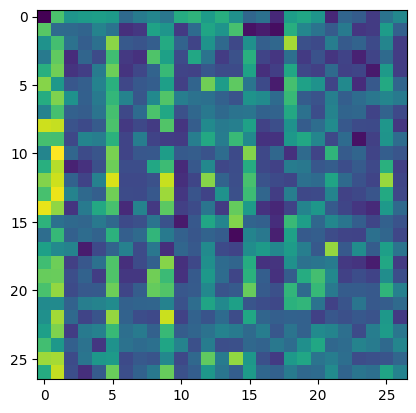

In [14]:
plt.imshow(W.detach().numpy())

In [15]:
#finally lets sample from NN model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W #predict log-counts
        counts = logits.exp() #count, equivalent to N
        p = counts / counts.sum(1, keepdims=True) #probs for next character
        
        #draw from p by using a normal distribution - see input line 23&23 of part 1
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
        
    print(''.join(out))
    
#below should be the same output as part 1 - see input line 25

mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.
